
🎥 Recommended Video: [Anomaly Detection](https://www.youtube.com/watch?v=AYap1FTvR9E)

# What is Anomaly Detection?

Imagine monitoring a city’s electricity grid. Most days, usage follows predictable patterns, but one day there’s a massive surge—an anomaly that could signal a power outage or unauthorized usage. Detecting such rare, significant deviations is the essence of **Anomaly Detection**.

Anomaly detection identifies items, events, or observations that differ significantly from the majority of data. This capability is invaluable across various domains, helping detect potential problems, risks, or opportunities early.

---

## Applications of Anomaly Detection

Anomaly detection is widely applied to identify deviations that signal critical issues or rare events. Below are some key areas:

### 1. **Fraud Detection**
Detecting fraudulent activities by identifying unusual patterns in transactional or behavioral data.

#### Examples:
- Credit card fraud detection (e.g., unexpected transactions in different locations).
- Insurance claim fraud (e.g., unusually high claim amounts).
- Identity theft (e.g., multiple login attempts from different geographies).

---

### 2. **System Health Monitoring**
Ensuring the smooth operation and maintenance of systems and equipment by spotting irregularities.

#### Examples:
- Monitoring server performance for unusual spikes or drops.
- Predicting industrial equipment failures through sensor data.
- Identifying network intrusions by detecting abnormal traffic patterns.

---

### 3. **Medical Diagnosis**
Supporting healthcare professionals by identifying anomalies that could signal medical conditions or risks.

#### Examples:
- Flagging abnormal test results (e.g., unexpected blood glucose levels).
- Detecting anomalies in medical imaging (e.g., unusual shapes in X-rays or MRIs).
- Monitoring patient health for sudden deviations (e.g., irregular heart rate patterns).

---

### 4. **Quality Control**
Maintaining and improving product and process quality by identifying defects or irregularities.

#### Examples:
- Detecting manufacturing defects using sensor or image data.
- Ensuring product quality through anomaly detection in production lines.
- Monitoring processes for deviations that could lead to inefficiencies.

---

Anomaly detection transforms raw data into actionable insights, enabling early interventions and informed decision-making. From fraud prevention to healthcare, its applications ensure efficiency, safety, and reliability across diverse domains.





## Visualizing Anomalous data

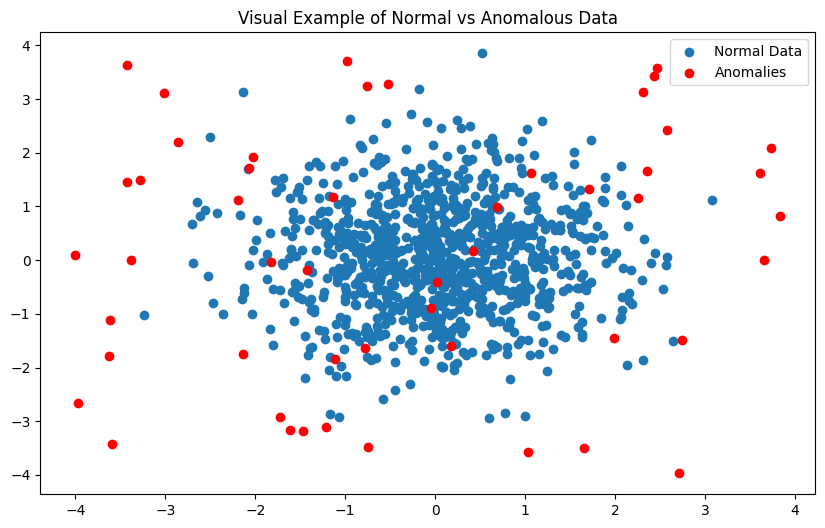

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Create a simple example of normal vs anomalous data
np.random.seed(42)
# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 2))
# Generate anomalies
anomalies = np.random.uniform(low=-4, high=4, size=(50, 2))

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')
plt.title('Visual Example of Normal vs Anomalous Data')
plt.legend()
plt.show()

## Types of Anomalies
1. **Point Anomalies**: Individual data points that deviate from the normal pattern  e.g A credit card transaction of N10,000 when typical transactions are under N100

2. **Contextual Anomalies**: Data points that are anomalous in a specific context  e.g 75°F might be normal in summer but anomalous in winter

3. **Collective Anomalies**: Collections of related data points that are anomalous with respect to the entire dataset e.g A sequence of unusual readings from an ECG

Let's visualize each type:

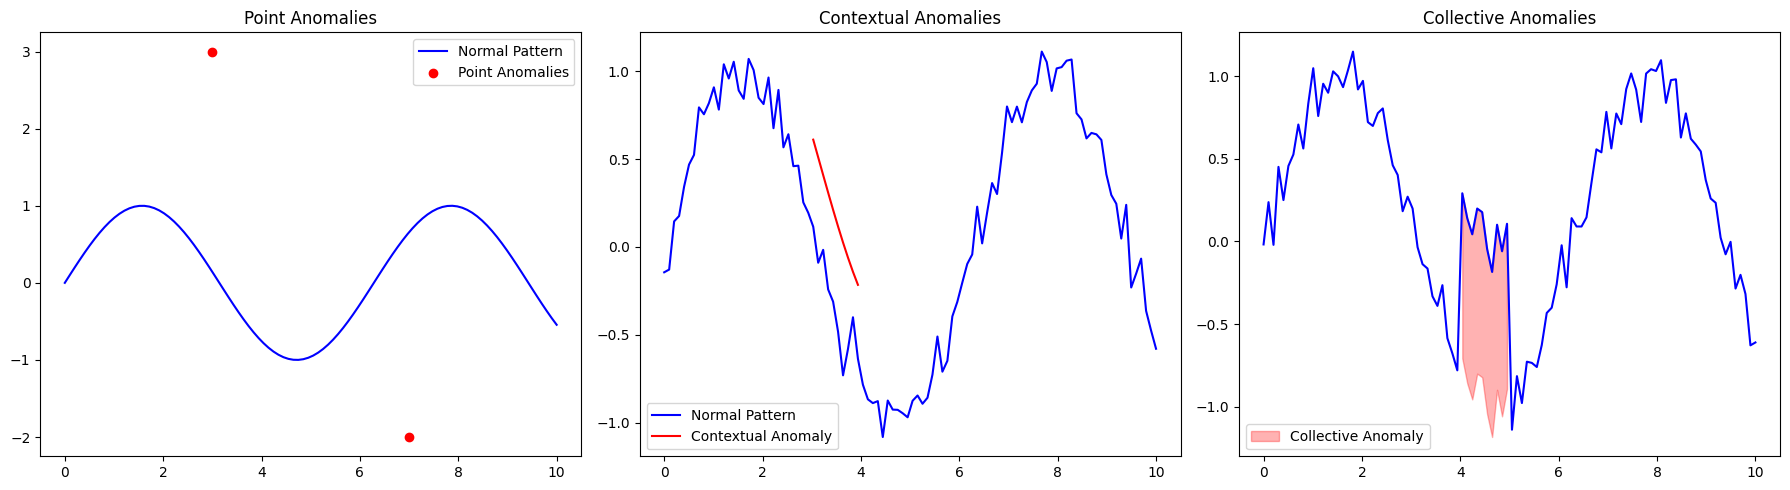

In [ ]:
# Create subplots for different types of anomalies
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Point Anomalies
x = np.linspace(0, 10, 100)
y = np.sin(x)
anomaly_points = np.array([[3, 3], [7, -2]])
axes[0].plot(x, y, 'b-', label='Normal Pattern')
axes[0].scatter(anomaly_points[:, 0], anomaly_points[:, 1], color='red', label='Point Anomalies')
axes[0].set_title('Point Anomalies')
axes[0].legend()

# 2. Contextual Anomalies
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)
contextual_anomaly = np.sin(x) + 0.5
axes[1].plot(x, y, 'b-', label='Normal Pattern')
axes[1].plot(x[30:40], contextual_anomaly[30:40], 'r-', label='Contextual Anomaly')
axes[1].set_title('Contextual Anomalies')
axes[1].legend()

# 3. Collective Anomalies
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)
y[40:50] = y[40:50] + 1
axes[2].plot(x, y, 'b-')
axes[2].fill_between(x[40:50], y[40:50], y[40:50]-1, color='red', alpha=0.3, label='Collective Anomaly')
axes[2].set_title('Collective Anomalies')
axes[2].legend()

plt.tight_layout()
plt.show()

## Common Applications

Let's simulate some real-world scenarios:

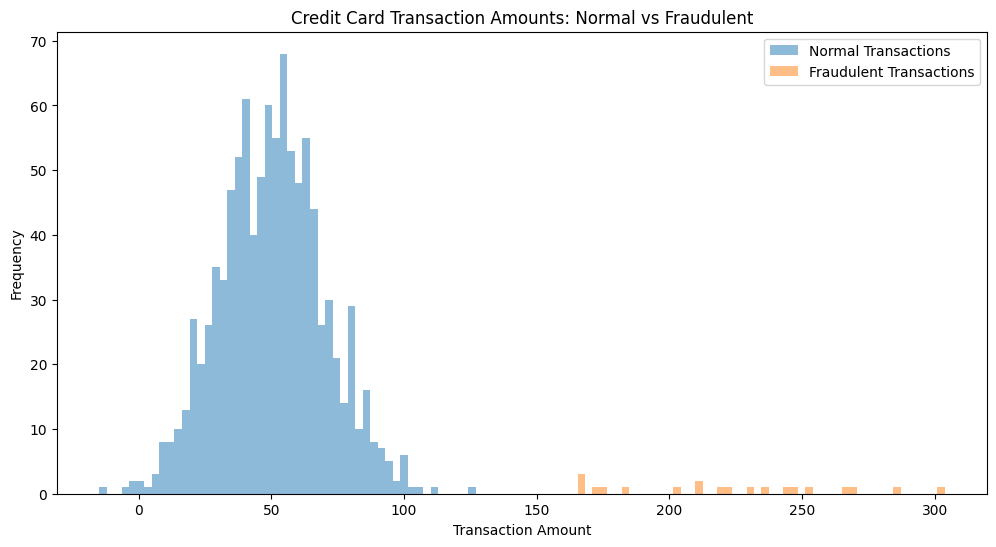

In [ ]:
# Example: Credit Card Fraud Detection
np.random.seed(42)

# Generate normal transactions
normal_transactions = np.random.normal(loc=50, scale=20, size=1000)
# Generate fraudulent transactions
fraud_transactions = np.random.normal(loc=200, scale=50, size=20)

plt.figure(figsize=(12, 6))
plt.hist(normal_transactions, bins=50, alpha=0.5, label='Normal Transactions')
plt.hist(fraud_transactions, bins=50, alpha=0.5, label='Fraudulent Transactions')
plt.title('Credit Card Transaction Amounts: Normal vs Fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Key Techniques for Anomaly Detection
We will look at some techniques for anomaly detection

### 1. Statistical Methods: Z-Score

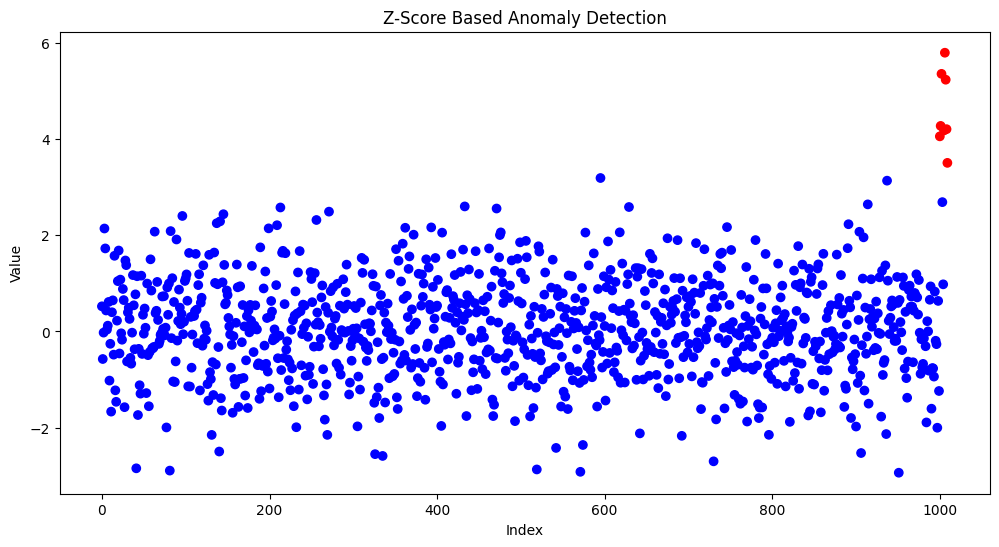

In [ ]:
def detect_anomalies_zscore(data, threshold=3):
    """Detect anomalies using Z-score method"""
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    return np.abs(z_scores) > threshold

# Generate sample data with known anomalies
normal_data = np.random.normal(loc=0, scale=1, size=1000)
anomalies = np.random.normal(loc=4, scale=1, size=10)
data = np.concatenate([normal_data, anomalies])

# Detect anomalies
anomaly_mask = detect_anomalies_zscore(data)

plt.figure(figsize=(12, 6))
plt.scatter(range(len(data)), data, c=['blue' if not x else 'red' for x in anomaly_mask])
plt.title('Z-Score Based Anomaly Detection')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

### 2. Isolation Forest
Isolation Forest is an unsupervised machine learning algorithm used for anomaly detection. It works by isolating anomalies (outliers) in the data rather than profiling normal data points. The key idea is that anomalies are "few and different," making them easier to isolate compared to normal data points.

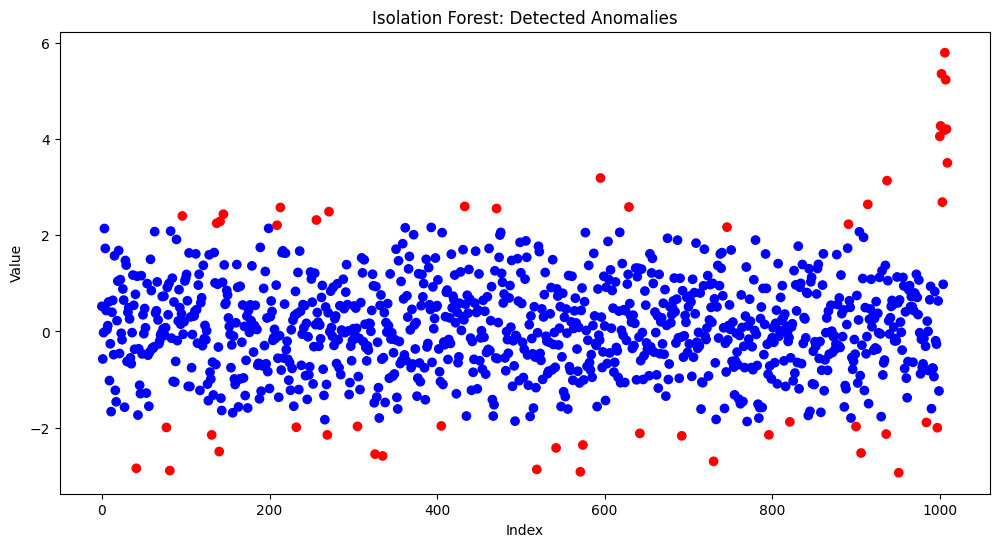

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Create and train Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # contamination is the expected proportion of outliers


# Combine normal and anomaly data
X = np.concatenate([normal_data, anomalies])
y_true = np.concatenate([np.zeros(len(normal_data)), np.ones(len(anomalies))])

# Fit and predict
y_pred = iso_forest.fit_predict(X.reshape(-1, 1))
# Convert predictions to binary (1 for anomaly, 0 for normal)
y_pred = [1 if x == -1 else 0 for x in y_pred]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure(figsize=(12, 6))
plt.scatter(range(len(X)), X, c=['blue' if pred == 0 else 'red' for pred in y_pred])
plt.title('Isolation Forest: Detected Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

### 3. Autoencoders

Autoencoders are a type of neural network(*We will visit Neural Network in a later module, you may skip the code block below and visit it after neural network*) used for unsupervised learning. They are designed to learn a compressed representation of the input data. Think of them as a way to "compress" data into a smaller form and then "decompress" it back to its original form. The goal is to make the output as close as possible to the input.

An autoencoder consists of two main parts:
1. **Encoder**: This part compresses the input data into a smaller representation (also called the "latent space").
2. **Decoder**: This part tries to reconstruct the original input data from the compressed representation.

Autoencoders are often used for tasks like:
- **Dimensionality Reduction**: Reducing the number of features in the data.
- **Anomaly Detection**: Identifying data points that are different from the majority (outliers).
- **Denoising**: Removing noise from data.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


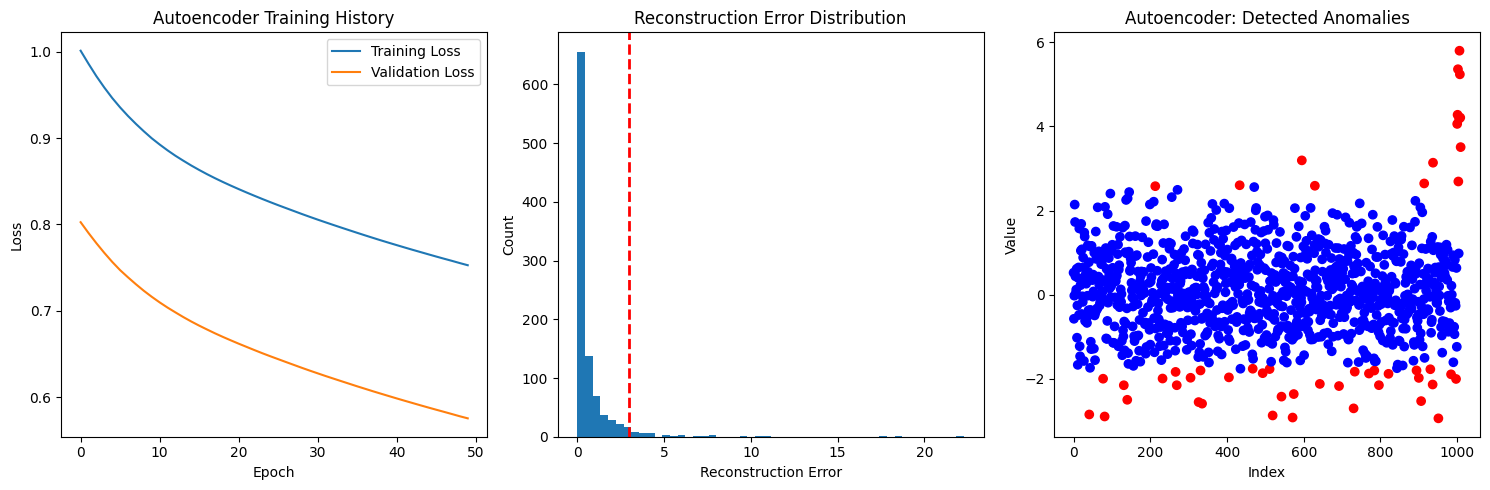

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

# Split data
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Build autoencoder
input_dim = 1
encoding_dim = 1

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test),
    verbose=0
)

# Get reconstruction error
reconstructed = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)
anomalies_ae = mse > threshold

# Visualize results
plt.figure(figsize=(15, 5))

# Plot training history
plt.subplot(131)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot reconstruction error
plt.subplot(132)
plt.hist(mse, bins=50)
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')

# Plot detected anomalies
plt.subplot(133)
plt.scatter(range(len(X)), X, c=['blue' if not x else 'red' for x in anomalies_ae])
plt.title('Autoencoder: Detected Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


Note other methods of Anomaly detection include: DBScan Clustering and Local Outlier Factor Anomaly Detection. See Recommended Video